# 1. Analyse des Biais de Genre (Sexisme)

Ce notebook analyse l'évolution de la représentation des femmes et des hommes dans les scripts de films (1960-2020) :

1. **Fréquence des mentions** : Combien de fois "woman/women" vs "man/men" ?
2. **Stéréotypes genrés** : Femmes émotionnelles vs hommes forts
3. **Objectification** : Descriptions physiques des femmes
4. **Rôles traditionnels** : Femmes au foyer vs hommes cadres
5. **Évolution temporelle** : Tendances par décennie

In [13]:
# Imports
import sys
sys.path.append('../src')

# Forcer le rechargement des modules
import importlib
if 'dictionaries' in sys.modules:
    importlib.reload(sys.modules['dictionaries'])
if 'stats_analysis' in sys.modules:
    importlib.reload(sys.modules['stats_analysis'])

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Nos modules
from dictionaries import GENDER_WORDS, GENDER_STEREOTYPES, GENDERED_ROLES
from stats_analysis import (
    analyze_gender_bias_by_decade,
    calculate_relative_frequency,
    compare_decades
)

# Configuration des graphiques
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ Imports réussis")

✓ Imports réussis


## 1. Chargement des Données

In [14]:
# Charger les données nettoyées
data_path = Path('../data/processed/scripts_clean.pkl')

if not data_path.exists():
    raise FileNotFoundError(
        "Fichier scripts_clean.pkl introuvable. "
        "Veuillez d'abord exécuter le notebook 0_clean_data.ipynb"
    )

df = pd.read_pickle(data_path)
print(f"✓ {len(df)} scripts chargés")
print(f"  Période : {df['release_year'].min():.0f} - {df['release_year'].max():.0f}")
print(f"  Décennies : {sorted(df['decade'].unique())}")

✓ 1787 scripts chargés
  Période : 1960 - 2020
  Décennies : [np.int64(1960), np.int64(1970), np.int64(1980), np.int64(1990), np.int64(2000), np.int64(2010), np.int64(2020)]


## 2. Analyse des Mentions de Genre

In [15]:
# Analyser les biais de genre par décennie
df_gender = analyze_gender_bias_by_decade(df, 'clean_text', 'decade')

print("=== Résultats par décennie ===")
display(df_gender)

=== Résultats par décennie ===


,decade,num_scripts,female_mentions_freq,male_mentions_freq,gender_ratio,female_negative_stereotypes,female_objectification,male_stereotypes
0,1960,34,10.373752,20.307827,0.510825,0.121351,0.841543,0.233908
1,1970,80,10.239441,17.952584,0.570360,0.099508,0.733441,0.231613
2,1980,187,12.464800,17.085580,0.729551,0.104589,0.769439,0.222182
3,1990,378,11.557360,17.747018,0.651228,0.103090,0.809323,0.242880
4,2000,521,12.996896,16.847264,0.771454,0.108480,0.775223,0.237347
5,2010,575,14.221446,16.367980,0.868858,0.113102,0.781855,0.239109
6,2020,12,15.238350,17.272672,0.882223,0.082644,0.626190,0.206611


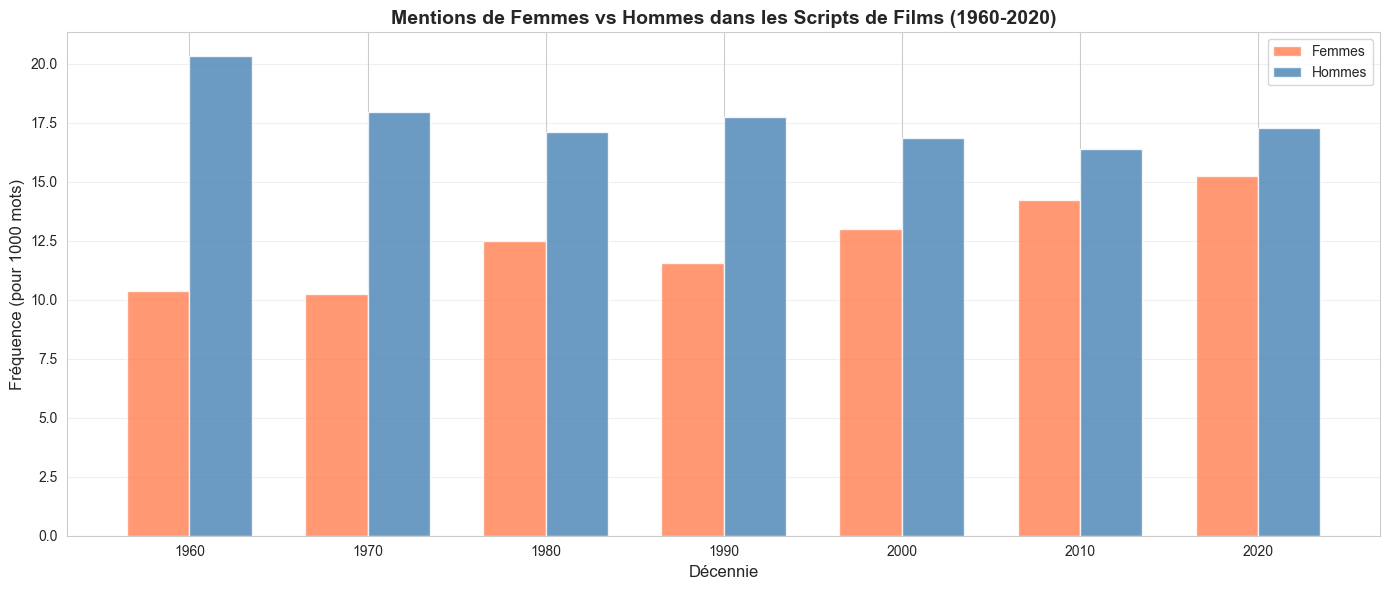

✓ Graphique sauvegardé : results/figures/gender_mentions_by_decade.png


In [16]:
# Visualisation : Mentions de femmes vs hommes
fig, ax = plt.subplots(figsize=(14, 6))

x = df_gender['decade']
width = 3.5

ax.bar(x - width/2, df_gender['female_mentions_freq'], width, label='Femmes', alpha=0.8, color='coral')
ax.bar(x + width/2, df_gender['male_mentions_freq'], width, label='Hommes', alpha=0.8, color='steelblue')

ax.set_xlabel('Décennie', fontsize=12)
ax.set_ylabel('Fréquence (pour 1000 mots)', fontsize=12)
ax.set_title('Mentions de Femmes vs Hommes dans les Scripts de Films (1960-2020)', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../results/figures/gender_mentions_by_decade.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Graphique sauvegardé : results/figures/gender_mentions_by_decade.png")

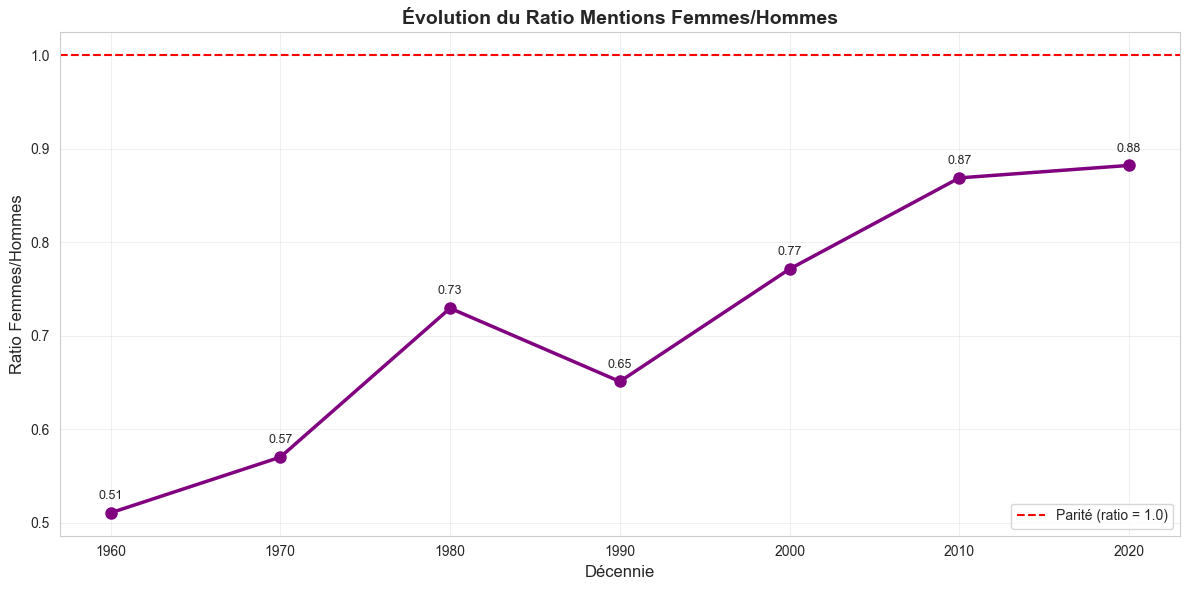

In [17]:
# Ratio Femmes/Hommes
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df_gender['decade'], df_gender['gender_ratio'], marker='o', linewidth=2.5, 
        markersize=8, color='purple')
ax.axhline(y=1.0, color='red', linestyle='--', linewidth=1.5, label='Parité (ratio = 1.0)')

ax.set_xlabel('Décennie', fontsize=12)
ax.set_ylabel('Ratio Femmes/Hommes', fontsize=12)
ax.set_title('Évolution du Ratio Mentions Femmes/Hommes', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(alpha=0.3)

# Annotations
for idx, row in df_gender.iterrows():
    ax.annotate(f"{row['gender_ratio']:.2f}", 
                xy=(row['decade'], row['gender_ratio']),
                xytext=(0, 10), textcoords='offset points',
                ha='center', fontsize=9)

plt.tight_layout()
plt.savefig('../results/figures/gender_ratio_evolution.png', dpi=300, bbox_inches='tight')
plt.show()

## 3. Analyse des Stéréotypes

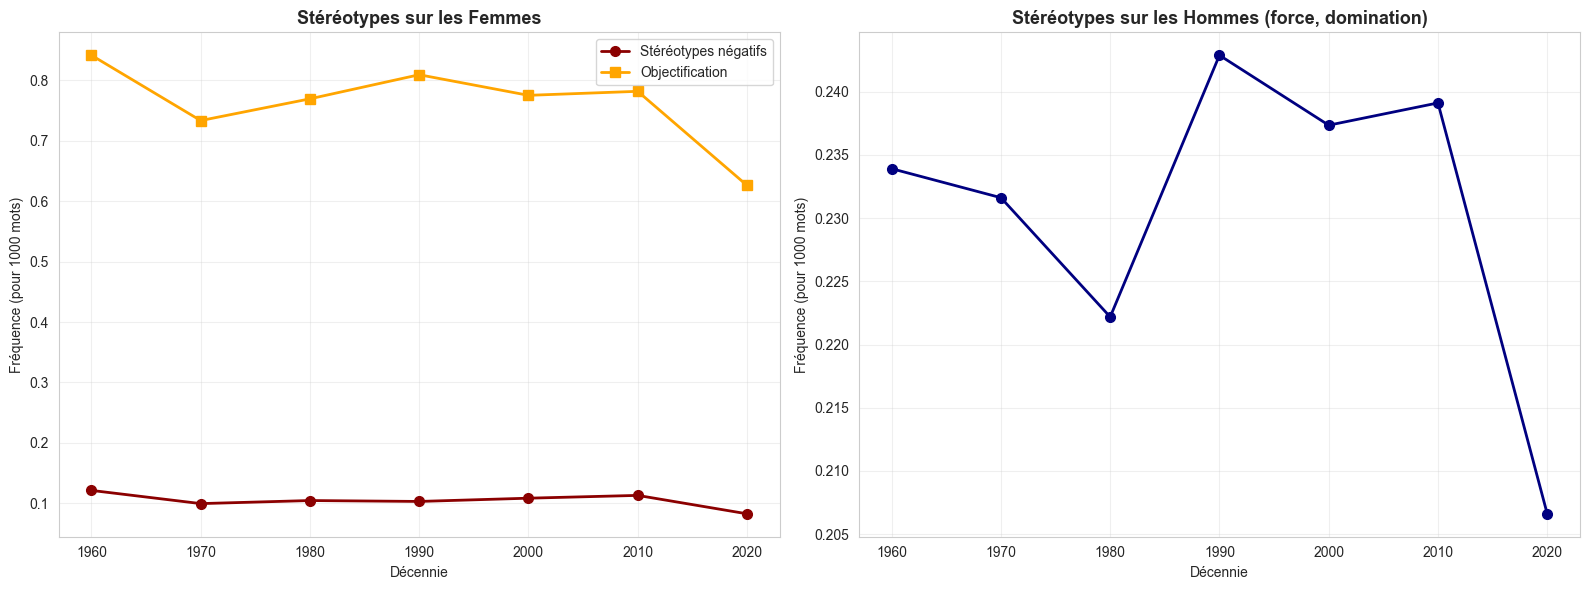

In [18]:
# Visualisation des stéréotypes
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Stéréotypes négatifs sur les femmes
axes[0].plot(df_gender['decade'], df_gender['female_negative_stereotypes'], 
             marker='o', linewidth=2, markersize=7, color='darkred', label='Stéréotypes négatifs')
axes[0].plot(df_gender['decade'], df_gender['female_objectification'], 
             marker='s', linewidth=2, markersize=7, color='orange', label='Objectification')
axes[0].set_title('Stéréotypes sur les Femmes', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Décennie')
axes[0].set_ylabel('Fréquence (pour 1000 mots)')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Stéréotypes masculins
axes[1].plot(df_gender['decade'], df_gender['male_stereotypes'], 
             marker='o', linewidth=2, markersize=7, color='navy')
axes[1].set_title('Stéréotypes sur les Hommes (force, domination)', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Décennie')
axes[1].set_ylabel('Fréquence (pour 1000 mots)')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../results/figures/gender_stereotypes.png', dpi=300, bbox_inches='tight')
plt.show()

## 4. Analyse Statistique des Tendances

In [19]:
# Comparer l'évolution de différentes métriques
metrics = [
    'female_mentions_freq',
    'male_mentions_freq',
    'gender_ratio',
    'female_negative_stereotypes',
    'female_objectification',
    'male_stereotypes'
]

print("=== ANALYSE DES TENDANCES ===")
print()

for metric in metrics:
    trend = compare_decades(df_gender, metric)
    
    print(f"📊 {metric.upper().replace('_', ' ')}")
    print(f"   Période : {trend['first_decade']:.0f} → {trend['last_decade']:.0f}")
    print(f"   Valeurs : {trend['first_value']:.2f} → {trend['last_value']:.2f}")
    print(f"   Évolution : {trend['change']:+.2f} ({trend['percent_change']:+.1f}%)")
    print(f"   Tendance : {trend['trend'].upper()}")
    print()

=== ANALYSE DES TENDANCES ===

📊 FEMALE MENTIONS FREQ
   Période : 1960 → 2020
   Valeurs : 10.37 → 15.24
   Évolution : +4.86 (+46.9%)
   Tendance : INCREASING

📊 MALE MENTIONS FREQ
   Période : 1960 → 2020
   Valeurs : 20.31 → 17.27
   Évolution : -3.04 (-14.9%)
   Tendance : DECREASING

📊 GENDER RATIO
   Période : 1960 → 2020
   Valeurs : 0.51 → 0.88
   Évolution : +0.37 (+72.7%)
   Tendance : INCREASING

📊 FEMALE NEGATIVE STEREOTYPES
   Période : 1960 → 2020
   Valeurs : 0.12 → 0.08
   Évolution : -0.04 (-31.9%)
   Tendance : DECREASING

📊 FEMALE OBJECTIFICATION
   Période : 1960 → 2020
   Valeurs : 0.84 → 0.63
   Évolution : -0.22 (-25.6%)
   Tendance : DECREASING

📊 MALE STEREOTYPES
   Période : 1960 → 2020
   Valeurs : 0.23 → 0.21
   Évolution : -0.03 (-11.7%)
   Tendance : DECREASING



## 5. Analyse par Film Individuel

In [20]:
# Calculer les métriques pour chaque film
print("Calcul des métriques par film...")

df['female_freq'] = df['clean_text'].apply(
    lambda x: calculate_relative_frequency(x, GENDER_WORDS['female'])
)
df['male_freq'] = df['clean_text'].apply(
    lambda x: calculate_relative_frequency(x, GENDER_WORDS['male'])
)
df['gender_ratio_film'] = df['female_freq'] / df['male_freq'].replace(0, np.nan)

df['female_stereotypes'] = df['clean_text'].apply(
    lambda x: calculate_relative_frequency(x, GENDER_STEREOTYPES['female_negative'])
)
df['objectification'] = df['clean_text'].apply(
    lambda x: calculate_relative_frequency(x, GENDER_STEREOTYPES['female_objectification'])
)

print("✓ Métriques calculées")

Calcul des métriques par film...
✓ Métriques calculées


In [21]:
# Films les plus biaisés (par décennie)
print("\n=== FILMS AVEC LE PLUS DE STÉRÉOTYPES NÉGATIFS SUR LES FEMMES ===")
print()

for decade in sorted(df['decade'].unique()):
    decade_films = df[df['decade'] == decade].copy()
    top_films = decade_films.nlargest(3, 'female_stereotypes')[['title', 'release_year', 'female_stereotypes']]
    
    print(f"📽️  {decade}s :")
    for idx, row in top_films.iterrows():
        print(f"   - {row['title']} ({row['release_year']:.0f}) : {row['female_stereotypes']:.2f}")
    print()


=== FILMS AVEC LE PLUS DE STÉRÉOTYPES NÉGATIFS SUR LES FEMMES ===

📽️  1960s :
   - Night of the Living Dead (1968) : 0.60
   - Bonnie and Clyde (1967) : 0.51
   - The Producers (1967) : 0.42

📽️  1970s :
   - Car Wash (1976) : 0.85
   - Carrie (1976) : 0.47
   - Jaws 2 (1978) : 0.38

📽️  1980s :
   - Airplane II: The Sequel (1982) : 0.60
   - Kiss of the Spider Woman (1985) : 0.58
   - Labyrinth (1986) : 0.34

📽️  1990s :
   - The Scarlet Letter (1995) : 0.87
   - Rage of the Werewolf (1999) : 0.49
   - Mission: Impossible (1996) : 0.45

📽️  2000s :
   - Mission: Impossible II (2000) : 0.45
   - Cast Away (2000) : 0.42
   - The Haunting in Connecticut (2009) : 0.40

📽️  2010s :
   - Nocturnal Animals (2016) : 0.73
   - Bareilly Ki Barfi (2017) : 0.52
   - Lone Survivor (2013) : 0.50

📽️  2020s :
   - The Grudge (2020) : 0.23
   - Palm Springs (2020) : 0.14
   - Dave (2020) : 0.11



/var/folders/nx/9n0zm1816l1gbyy2500y8d580000gn/T/ipykernel_57800/2571731100.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_boxplot, x='decade', y='gender_ratio_film', ax=ax, palette='Set2')


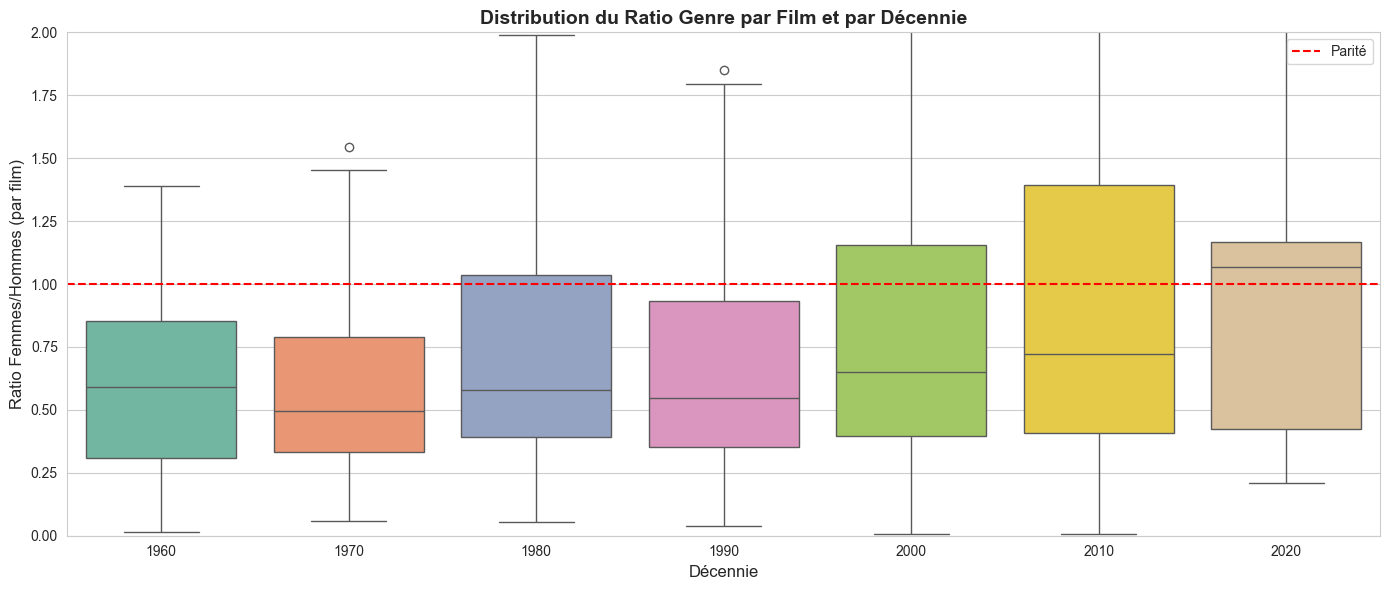

In [22]:
# Distribution des ratios par décennie (boxplot)
fig, ax = plt.subplots(figsize=(14, 6))

df_boxplot = df[df['gender_ratio_film'].notna()].copy()
sns.boxplot(data=df_boxplot, x='decade', y='gender_ratio_film', ax=ax, palette='Set2')

ax.axhline(y=1.0, color='red', linestyle='--', linewidth=1.5, label='Parité')
ax.set_xlabel('Décennie', fontsize=12)
ax.set_ylabel('Ratio Femmes/Hommes (par film)', fontsize=12)
ax.set_title('Distribution du Ratio Genre par Film et par Décennie', fontsize=14, fontweight='bold')
ax.legend()
ax.set_ylim(0, 2)

plt.tight_layout()
plt.savefig('../results/figures/gender_ratio_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

## 6. Sauvegarde des Résultats

In [23]:
# Sauvegarder les résultats agrégés
output_dir = Path('../results')
output_dir.mkdir(exist_ok=True)

df_gender.to_csv(output_dir / 'gender_bias_by_decade.csv', index=False)
print(f"✓ Résultats sauvegardés : {output_dir / 'gender_bias_by_decade.csv'}")

# Sauvegarder aussi les données par film
df_films_gender = df[['title', 'release_year', 'decade', 'female_freq', 'male_freq', 
                       'gender_ratio_film', 'female_stereotypes', 'objectification']].copy()
df_films_gender.to_csv(output_dir / 'gender_bias_by_film.csv', index=False)
print(f"✓ Données par film : {output_dir / 'gender_bias_by_film.csv'}")

print("\n✅ Analyse du sexisme terminée !")

✓ Résultats sauvegardés : ../results/gender_bias_by_decade.csv
✓ Données par film : ../results/gender_bias_by_film.csv

✅ Analyse du sexisme terminée !


## 7. Résumé et Conclusions

### Observations principales

À compléter après exécution du notebook avec vos résultats :

- **Représentation** : Les hommes sont mentionnés [X] fois plus souvent que les femmes
- **Évolution** : Le ratio femmes/hommes a [augmenté/diminué/stagné] entre 1960 et 2020
- **Stéréotypes** : Les stéréotypes négatifs sur les femmes ont [augmenté/diminué]
- **Objectification** : Les descriptions physiques ont [augmenté/diminué]

### Hypothèses à tester

1. Les films réalisés par des femmes montrent-ils moins de biais ?
2. Y a-t-il des différences par genre cinématographique (action, romance, etc.) ?
3. Les dialogues masculins vs féminins diffèrent-ils en longueur et complexité ?